<table class="table">
    <tr>
        <th style="text-align:left; vertical-align: middle; width:30%">
            <img src='https://docs.google.com/uc?id=1kF5iiNhcaEXEV9FF7JqN7ZwpqSi_tf_r' style="height: 90px; ">
        </th>
        <th style="text-align:right; vertical-align: middle;">
        <font color=blue size = '4' >SMU FYP: Transport Effiency at One North </font>
        </th>
    </tr>
</table>

<font size = '5' ><b> Topic Modeling using gensim LDA on Instagram hashtag related to One North. </b></font>


<font size = '4' ><b> We did Topic Modeling on Instagram Hashtags to extract key themes or topics from the corpus of documents.</b></font>
 - We used LDA (Latent Dirichlet Allocation) technique to do our topic modeling.  
 - LDA uses a generative probabilistic model. Each document is represented as a mixture of topics, where topics are represented as distribution of words
 - It is essentially a text clustering problem, where documents and words are clustered simultaneously
 - Often used as an exploratory analysis for text data. E.g. reviews, tweets, blogs, articles
 - Also used for document clustering, feature engineering for text data
 - Latent Dirichlet Allocation (LDA)

Used the following commands to install gensim and pyldavis -

 - !pip install gensim OR conda install gensim
 - conda install -c conda-forge pyldavis

In [2]:
# Standard dataframe packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Text analytics packages
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Object serialization package - save the python objects directly to files 
# Tutorial: https://pythonprogramming.net/python-pickle-module-save-objects-serialization/
import pickle

###  1. About the data

The data used in this analysis is extracted from Twitter, where hashtags are related to One North and its transportation. 
 
The data set has been cleaned prior to it being loaded in for analysis. The following has been removed: 
 - Emojis
 - Non - English Characters 
 - Symbols 

To read the input pickle file -

In [29]:
#ig_data = pd.read_csv('UpdatedOneNorthTransport_IGResults_with_Username.csv', header=0, encoding='latin1')
#twitter_data = pd.read_csv('twitter_newBus_data.csv', header=0, encoding='utf-8')#twitter_data = pd.read_csv('twitter_newMRT_data.csv', header=0, encoding='utf-8')
twitter_data = pd.read_csv('twitter_newMRT_data.csv', header=0, encoding='latin-1')

twitter_data.dtypes

"Datetime"     object
"Tweet ID"    float64
Text           object
"Username"     object
Score         float64
dtype: object

In [30]:
sentences = twitter_data['Text']
#sentences = ig_data["edge_media_to_caption.edges"]
 
print (sentences)
print (len(sentences))
print (type (twitter_data))

0     "I think there 2019s a major power fault affec...
1     "I witnessed a similar back-and-forth drama pl...
2     "@kennesu_g the dream of working in one north ...
3     "This old man took mrt at one-North had the ne...
4     "Been working at one-north for two years now, ...
5              "Calm.#flowers @ one-north MRT Station "
6     "someone once said that one-north is the only ...
7     "I want to be able to climb the stairs at the ...
8     "Still no pedestrian crossing for JTC LaunchPa...
9             "One-north TOP 10 worst MRT stations bad"
10    "This situation at one-north MRT looked suspic...
11    "Cycling to office from one-north mrt station....
12    "Some MRT stops cn be id-ed by smells tt waft ...
13    "Exiting one-north MRT always feels like a mil...
14    "Exiting at one-north. There's a Subway here (...
15    "Fasting, week 5! There's a Subway at one-nort...
16    "Train delay on the Circle Line has apparently...
17    "Why dont we have a pedestrian crossing be

### 2. Text preprocessing using NLTK
<b>A function that does the following - </b>
 - Convert each news text to lower case
 - Tokenize
 - Remove stop words
 - Lemmatization
 - returns preprocessed list of news documents

In [5]:
#create stop words list
stop_words = nltk.corpus.stopwords.words('english')

#create tokenizer
#\w matches [a-zA-Z0-9_]. This tokenizer splits the string using regular expressions. E.g - '[A-Z]\w+' will select just the capital words
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')

#create lemmatizer
wnl = nltk.stem.wordnet.WordNetLemmatizer()


In [6]:
def process_text(documents):
    process_docs = []
    doc_tokens = []
    for doc in documents:
        doc = doc.lower()
        doc_tokens = wtk.tokenize(doc)
        doc_tokens = [token for token in doc_tokens if token not in stop_words]
        #to lemmatize, which is to convert to base word but make sure the word is valid still 
        doc_tokens = [wnl.lemmatize(token) for token in doc_tokens] #Can try spacy or see how to use the (nltk.pos_tag()) with lemmatizer
        #remove those words that has entries of 1 character or null 
        doc_tokens = [token for token in doc_tokens if len(token) > 1]
        process_docs.append(doc_tokens)
    return process_docs

In [7]:
process_twitter_data = process_text(sentences)
print(len(process_twitter_data))
#print(process_ig_data)

55


In [8]:
# Print the first 3 captions 
for i in range(3): 
    print (process_twitter_data[i])
    print ("\n")
    

    

['think', '2019s', 'major', 'power', 'fault', 'affecting', 'lot', 'mrt', 'line', 'singapore', 'one', 'north', 'station', 'circle', 'line', 'stopped', 'service', 'take', 'note', 'follow', 'smrt_singapore', 'update', 'either', 'angry', 'singaporean', 'tweet', 'hahaha', 'inconvenient']


['witnessed', 'similar', 'back', 'forth', 'drama', 'play', 'road', 'crossing', 'one', 'north', 'mrt', 'blk71', 'period', 'almost', 'year', 'it2019s', 'one', 'thing', 'gave', 'faith', 'fellow', 'singaporean', 'commuter']


['kennesu_g', 'dream', 'working', 'one', 'north', 'zone', 'bc', 'close', 'house', 'fairly', 'decent', 'area', 'work', 'versus', 'weird', 'industrial', 'area', 'mrt', 'convenient']




In [9]:
# Keep the processed tokens as a sentence
news_sentences = []
for i in range(len(process_twitter_data)): 
    sentence = process_twitter_data[i]
    news_sentences.append(' '.join(sentence))

#print(new_sentences)

### 3. Topic Modeling
We have completed the text preprocessing and ready to move on to Topic modeling.

#### STEP 1 - Create a dictionary representaion
`gensim` dictionary assigns an integer id to each unique word in the corpus

In [10]:
# Create a dictionary representation of the documents. Each word gets an id
dictionary = gensim.corpora.Dictionary(process_twitter_data)

print('Sample word to id mappings:\n', list(dictionary.items())[:50])
print('Total Vocabulary Size:', len(dictionary))

Sample word to id mappings:
 [(0, '2019s'), (1, 'affecting'), (2, 'angry'), (3, 'circle'), (4, 'either'), (5, 'fault'), (6, 'follow'), (7, 'hahaha'), (8, 'inconvenient'), (9, 'line'), (10, 'lot'), (11, 'major'), (12, 'mrt'), (13, 'north'), (14, 'note'), (15, 'one'), (16, 'power'), (17, 'service'), (18, 'singapore'), (19, 'singaporean'), (20, 'smrt_singapore'), (21, 'station'), (22, 'stopped'), (23, 'take'), (24, 'think'), (25, 'tweet'), (26, 'update'), (27, 'almost'), (28, 'back'), (29, 'blk71'), (30, 'commuter'), (31, 'crossing'), (32, 'drama'), (33, 'faith'), (34, 'fellow'), (35, 'forth'), (36, 'gave'), (37, 'it2019s'), (38, 'period'), (39, 'play'), (40, 'road'), (41, 'similar'), (42, 'thing'), (43, 'witnessed'), (44, 'year'), (45, 'area'), (46, 'bc'), (47, 'close'), (48, 'convenient'), (49, 'decent')]
Total Vocabulary Size: 372


#### STEP 2 -  Set parameters (values depend on the problem and data being used)

Next, we filtered the vocabulary based on Frequency. This is so that certain words that are less important or do not help to differentiate the topics are removed.<br>
https://radimrehurek.com/gensim/corpora/dictionary.html

In [11]:
# Use the reference: Filter out words that occur in less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=2, no_above=0.2)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 141


#### STEP 3 - Create the vector space model (Bag of words model in gensim)
Subeseuqently, we run the Bag of Words Model. The function `doc2bow()` will first count the number of occurrences for every unique word and then convert the word to its integer word id. The result as a sparse vector(words from the dictionary not present in the document are not stored in the document vector) is then returned. 


In [12]:
# Transforming corpus into bag of words vectors
corpus_vect = [dictionary.doc2bow(text) for text in process_twitter_data]

This is how the vector looks like for first few news document:

In [13]:
for i in range(3):
    print('Item is ',i)
    print(corpus_vect[i])
    print(process_twitter_data[i],'\n')

Item is  0
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
['think', '2019s', 'major', 'power', 'fault', 'affecting', 'lot', 'mrt', 'line', 'singapore', 'one', 'north', 'station', 'circle', 'line', 'stopped', 'service', 'take', 'note', 'follow', 'smrt_singapore', 'update', 'either', 'angry', 'singaporean', 'tweet', 'hahaha', 'inconvenient'] 

Item is  1
[(15, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
['witnessed', 'similar', 'back', 'forth', 'drama', 'play', 'road', 'crossing', 'one', 'north', 'mrt', 'blk71', 'period', 'almost', 'year', 'it2019s', 'one', 'thing', 'gave', 'faith', 'fellow', 'singaporean', 'commuter'] 

Item is  2
[(26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)]
['kennesu_g', 'dream', 'working', 'one', 'north', 'zone', 'bc', 'close', 'house', 'fairly', 'dece

In [14]:
#example vector element
#first item in the vector
print(len(corpus_vect[0]))
print(len(process_twitter_data[0]))


22
28


The output is not the same number as they are not of the same length. This is because we filtered some words from the dictionary and only the words in dictionary are used to form the vector.

We will now index the terms and their respective document frequencies into the dictionary. 

Below shows an example for the first document:


In [15]:
print([(dictionary[id] , freq) for id, freq in corpus_vect[0]])

[('affecting', 1), ('angry', 1), ('circle', 1), ('either', 1), ('fault', 1), ('follow', 1), ('hahaha', 1), ('inconvenient', 1), ('line', 2), ('lot', 1), ('major', 1), ('note', 1), ('power', 1), ('service', 1), ('singapore', 1), ('singaporean', 1), ('smrt_singapore', 1), ('stopped', 1), ('take', 1), ('think', 1), ('tweet', 1), ('update', 1)]


#### STEP 4 - Apply the GENSIM LDA Model

`Note: several parameters can be set to fine tune the model. We keep the defaults here.`
- https://radimrehurek.com/gensim/models/ldamodel.html. 

To ensure consistency across devices for comparison, we wil import and use random numbers. 


In [16]:
# Understanding random numbers
import random

#random.seed(1)
print(random.randint(0,9))

5


In [23]:
num_topics = 3

ldamodel = gensim.models.ldamodel.LdaModel(corpus_vect, num_topics = num_topics, id2word=dictionary, passes=25, random_state= 0)


In [18]:
print(type(ldamodel))

<class 'gensim.models.ldamodel.LdaModel'>


We run the LDA model to obtain the equation, based on the topics generated from above. 

In [29]:
print(ldamodel.print_topics(num_topics = num_topics, num_words = 10))

[(0, '0.031*"line" + 0.026*"subway" + 0.021*"smrt_singapore" + 0.021*"singapore" + 0.021*"take" + 0.021*"circle" + 0.021*"push" + 0.021*"full" + 0.016*"smell" + 0.016*"airport"'), (1, '0.071*"train" + 0.036*"service" + 0.036*"circle" + 0.036*"line" + 0.026*"co" + 0.026*"walk" + 0.026*"bishan" + 0.026*"shuttle" + 0.023*"like" + 0.021*"vista"'), (2, '0.045*"area" + 0.030*"pedestrian" + 0.023*"ltasg" + 0.023*"got" + 0.023*"damn" + 0.016*"top" + 0.016*"working" + 0.016*"catch" + 0.016*"near" + 0.016*"crossing"')]


We then format the topics in print upon receiving the outcome, as seen below. 

In [30]:
#formatting the topics in print
for num ,topic in ldamodel.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(num)+": "+ topic)

0: 0.031*"line" + 0.026*"subway" + 0.021*"smrt_singapore" + 0.021*"singapore" + 0.021*"take" + 0.021*"circle" + 0.021*"push" + 0.021*"full" + 0.016*"smell" + 0.016*"airport"
1: 0.071*"train" + 0.036*"service" + 0.036*"circle" + 0.036*"line" + 0.026*"co" + 0.026*"walk" + 0.026*"bishan" + 0.026*"shuttle" + 0.023*"like" + 0.021*"vista"
2: 0.045*"area" + 0.030*"pedestrian" + 0.023*"ltasg" + 0.023*"got" + 0.023*"damn" + 0.016*"top" + 0.016*"working" + 0.016*"catch" + 0.016*"near" + 0.016*"crossing"


In [31]:
#alternatively save the topic word distribution in a list
topics = ldamodel.show_topics(formatted=True, num_topics=5, num_words=10)

In [32]:
#print the topics
for i in topics:
    print(i)


(0, '0.031*"line" + 0.026*"subway" + 0.021*"smrt_singapore" + 0.021*"singapore" + 0.021*"take" + 0.021*"circle" + 0.021*"push" + 0.021*"full" + 0.016*"smell" + 0.016*"airport"')
(1, '0.071*"train" + 0.036*"service" + 0.036*"circle" + 0.036*"line" + 0.026*"co" + 0.026*"walk" + 0.026*"bishan" + 0.026*"shuttle" + 0.023*"like" + 0.021*"vista"')
(2, '0.045*"area" + 0.030*"pedestrian" + 0.023*"ltasg" + 0.023*"got" + 0.023*"damn" + 0.016*"top" + 0.016*"working" + 0.016*"catch" + 0.016*"near" + 0.016*"crossing"')


#### STEP 5 - Evaluation by Computing the Perplexity and Coherence Score

Perplexity measures the uncertainty, where the lower the better. 

Note: gensim provides log_perplexity(chunk, total_docs=None) which calculates and returns per-word likelihood bound, using a chunk of documents as evaluation corpus(dictionary).

perplexity=2^(-bound)

Coherence measures "homogeneity", where the higher the value, the better. 

Typically, they are used for comparisons across models. Just by using the values on a single model has little meaning. 

In [23]:
from gensim.models import CoherenceModel

In [ ]:
log_perplexity = ldamodel.log_perplexity(corpus_vect)
perplexity = 2**(-log_perplexity)
print('Perplexity: ',perplexity)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=process_twitter_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

#compare the perplexity and coherence score - highest coherence score = most suitable no of topics 

Perplexity:  13.135572009595863


We plotted a coherence vs number of topics graph. We found that the suitable number of topics was 4. Hence, we updated the above num_topics value to be 4. 

#### STEP 6 - Interpretation 

A) Topic as the distribution over words

Let's visualize using Pyladavis

In [19]:
import pyLDAvis.gensim

In [24]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus_vect, dictionary)


C:\Users\Krystal Ong\Downloads\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.133738 -0.094469       1        1  45.154507
2     -0.158923 -0.055701       2        1  27.936775
1      0.025185  0.150170       3        1  26.908720, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
77    Default  10.000000        train  10.000000  30.0000  30.0000
26    Default   5.000000         area   5.000000  29.0000  29.0000
90    Default   4.000000         walk   4.000000  28.0000  28.0000
43    Default   3.000000         full   3.000000  27.0000  27.0000
44    Default   3.000000          man   3.000000  26.0000  26.0000
47    Default   3.000000         push   3.000000  25.0000  25.0000
133   Default   3.000000         near   3.000000  24.0000  24.0000
82    Default   3.000000       subway   3.000000  23.0000  23.0000
50    Default   3.000000         like   3.000000  22.0000  22.0000
38    Default   3.000000      working   3.000000  21.0000  21.0000
8     Default  10.000000         line  10.000000  20.0000  20.0000
127   Default   2.000000           co   2.000000  19.0000  19.0000
123   Default   2.000000         damn   2.000000  18.0000  18.0000
84    Default   2.000000         good   2.000000  17.0000  17.0000
80    Default   2.000000   experience   2.000000  16.0000  16.0000
95    Default   2.000000    breakdown   2.000000  15.0000  15.0000
101   Default   2.000000       taking   2.000000  14.0000  14.0000
71    Default   2.000000          art   2.000000  13.0000  13.0000
89    Default   3.000000        vista   3.000000  12.0000  12.0000
2     Default   9.000000       circle   9.000000  11.0000  11.0000
75    Default   3.000000        smell   3.000000  10.0000  10.0000
14    Default   4.000000    singapore   4.000000   9.0000   9.0000
13    Default   7.000000      service   7.000000   8.0000   8.0000
62    Default   4.000000   pedestrian   4.000000   7.0000   7.0000
48    Default   2.000000         slap   2.000000   6.0000   6.0000
42    Default   2.000000         face   2.000000   5.0000   5.0000
49    Default   2.000000         took   2.000000   4.0000   4.0000
46    Default   2.000000          old   2.000000   3.0000   3.0000
40    Default   2.000000        cabin   2.000000   2.0000   2.0000
139   Default   2.000000      private   2.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
133    Topic3   3.006302         near   3.506840   1.1587  -3.5705
82     Topic3   2.970201       subway   3.507291   1.1465  -3.5826
127    Topic3   2.313848           co   2.812527   1.1175  -3.8323
123    Topic3   2.271199         damn   2.815440   1.0979  -3.8509
95     Topic3   2.259016    breakdown   2.816663   1.0921  -3.8563
48     Topic3   1.619727         slap   2.118218   1.0444  -4.1890
42     Topic3   1.619727         face   2.118217   1.0444  -4.1890
49     Topic3   1.619726         took   2.118217   1.0444  -4.1890
46     Topic3   1.619725          old   2.118218   1.0444  -4.1890
40     Topic3   1.619722        cabin   2.118218   1.0444  -4.1890
134    Topic3   1.619720       burned   2.118219   1.0444  -4.1890
139    Topic3   1.619720      private   2.118219   1.0444  -4.1890
41     Topic3   1.619719         dude   2.118217   1.0444  -4.1890
136    Topic3   1.619720          got   2.118219   1.0444  -4.1890
138    Topic3   1.619720     interior   2.118219   1.0444  -4.1890
137    Topic3   1.619720         half   2.118219   1.0444  -4.1890
135    Topic3   1.619719   completely   2.118219   1.0444  -4.1890
45     Topic3   1.619713        nerve   2.118219   1.0444  -4.1890
129    Topic3   1.619652         peak   2.118228   1.0444  -4.1890
131    Topic3   1.619652         time   2.118228   1.0444  -4.1890
130    Topic3   1.619652         suck   2.118228   1.0444  -4.1890
128    Topic3   1.619649         hour   2.118228   1.0443  -4.1890
91

# Sentiment Analysis

In [24]:
# actually same csv file as above
bdata = pd.read_csv('twitter_newBus_data.csv', header=0, encoding='utf8')
sentences = bdata['"Text"']
print (sentences)

0     Full Time Tea Barista: Tea Tree Cafe Ptd Ltd L...
1                         Bus catches fire at one-north
2                         Bus catches fire at one-north
3     Damn, a private bus got its interior and top h...
4     moovit singapore provide wrong info for my tri...
5     I hope we are able to get this apartment near ...
6     lyf one-north Singapore, offers 324 units for ...
7     Bus Service 191 will skip 9 bus stops in the o...
8     Auto Retweet SBSTransit_Ltd *AUTO SCRIPT,MAY B...
9     [Notice-SBS] Service 191 to skip bus stops alo...
10    Service 191 to skip bus stops along Media Circ...
11    After 34 years of operations, Ayer Rajah Bus P...
12    New Transtar Cross-Border Bus Service TS6 enab...
13    Bus Service 191 will be diverted from 5:30am t...
14    [Notice-SBS] Service 191 will skip bus stops a...
15    Service 191 will skip bus stops along Portsdow...
Name: "Text", dtype: object


In [25]:
from textblob import TextBlob

In [26]:
for i in range(len(bdata)):
    scoresTB = TextBlob(sentences.iloc[i]).sentiment
    #print(scoresTB)

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\Krystal Ong\Downloads\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
analyzer = SentimentIntensityAnalyzer()
print (analyzer)

In [29]:
for i in range(len(sentences)):
    scores = analyzer.polarity_scores(sentences.iloc[i])
    print (scores)
#proportion of words in negative, neutral, etc

{'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'compound': 0.3818}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.146, 'neu': 0.757, 'pos': 0.097, 'compound': -0.2263}
{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'compound': -0.4767}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.4404}
{'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.039, 'neu': 0.961, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.052, 'neu': 0.948, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.052, 'neu': 0.948, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.1531}


In [30]:
#Printing the sentiment nicely in a table format. 
my_vader_score_compound = [ ] 
my_vader_score_positive = [ ] 
my_vader_score_negative = [ ] 
my_vader_score_neutral = [ ] 

for i in range(len(sentences)):
    my_analyzer = analyzer.polarity_scores(sentences.iloc[i])
    my_vader_score_compound.append(my_analyzer['compound'])
    my_vader_score_positive.append(my_analyzer['pos'])
    my_vader_score_negative.append(my_analyzer['neg']) 
    my_vader_score_neutral.append(my_analyzer['neu']) 


#converting sentiment values to numpy for easier usage
my_vader_score_compound = np.array(my_vader_score_compound)
my_vader_score_positive = np.array(my_vader_score_positive)
my_vader_score_negative = np.array(my_vader_score_negative)
my_vader_score_neutral = np.array(my_vader_score_neutral)

In [45]:
bdata['Score'] = my_vader_score_compound
bdata['postve'] = my_vader_score_positive
bdata['neg'] = my_vader_score_negative
bdata['neu'] = my_vader_score_neutral

# This option is just to restrict the column width for printing purposes.
pd.options.display.max_colwidth = 40

# Print the dataframe
print (bdata)
df = pd.DataFrame(bdata, columns = ['Score'])
df.to_csv (r'C:\Users\Krystal Ong\Desktop\FYP\export_twitterbus.csv', index = False, header=True)

                   "Datetime"    "Tweet ID"  \
0   2020-06-12 03:12:32+00:00  1.271280e+18   
1   2020-02-24 04:18:05+00:00  1.231800e+18   
2   2020-02-24 04:16:34+00:00  1.231800e+18   
3   2020-02-24 01:27:53+00:00  1.231750e+18   
4   2019-03-02 11:01:38+00:00  1.101800e+18   
5   2019-01-30 11:34:29+00:00  1.090570e+18   
6   2019-01-29 01:47:37+00:00  1.090060e+18   
7   2018-12-01 11:33:15+00:00  1.068830e+18   
8   2018-11-27 03:32:42+00:00  1.067260e+18   
9   2018-11-27 03:29:32+00:00  1.067260e+18   
10  2018-11-27 03:29:00+00:00  1.067260e+18   
11  2018-09-10 11:33:17+00:00  1.039110e+18   
12  2018-09-01 05:32:09+00:00  1.035760e+18   
13  2018-04-28 12:37:17+00:00  9.902080e+17   
14  2018-04-25 08:37:32+00:00  9.890610e+17   
15  2018-04-25 08:36:58+00:00  9.890610e+17   

                                     "Text"       "Username"   Score  postve  \
0   Full Time Tea Barista: Tea Tree Cafe...        FindSGJob  0.3818   0.066   
1             Bus catches fire at one-no

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Krystal Ong\\Desktop\\FYP\\export_twitterbus.csv'

Based on the above Sentiment analysis of the Instagram comments:

The sample outputs suggests that the comments are largely positive or neutral in regards to One North.

- There are hardly any negative comments for One North as the scores are mostly 0.

# Instagram Wordcloud


In [84]:
data = pd.read_csv('twitter_newMRT_data - Copy.csv', header=0, encoding='latin1')
data.head()


,"""Datetime""","""Tweet ID""",Text,"""Username""",Score
0,"""2020-10-14 11:55:59+00:00""",1.320000e+18,"""I think there 2019s a major power fault affec...","""JoakimGomez""",-0.8360
1,"""2020-10-13 04:59:31+00:00""",1.320000e+18,"""I witnessed a similar back-and-forth drama pl...","""visakanv""",-0.7974
2,"""2019-12-31 15:34:41+00:00""",1.210000e+18,"""@kennesu_g the dream of working in z, bc its ...","""CyanRhapsody""",-0.7430
3,"""2019-11-12 10:49:25+00:00""",1.190000e+18,"""This old man took at had the nerve to push m...","""RRdzan""",-0.7351
4,"""2019-05-09 11:11:30+00:00""",1.130000e+18,"""Been working at for two years , but I never r...","""kuayunie""",-0.6249


In [85]:
print("\nNumber of records in train  : ", len(data))


Number of records in train  :  55


In [86]:
#test
data.Text.iloc[0]

'"I\xa0think there 2019s\xa0a\xa0major\xa0power\xa0fault\xa0affecting\xa0a\xa0lot\xa0of\xa0\xa0s\xa0in\xa0.\xa0-\xa0\xa0which\xa0is\xa0the\xa0\xa0\xa0has\xa0stopped\xa0s.\xa0\xa0note.\xa0And\xa0follow\xa0@\xa0for\xa0more\xa0updates.Either\xa0that\xa0or\xa0angry\xa0an\xa0tweets\xa0hahaha. inconvenient"'

In [87]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



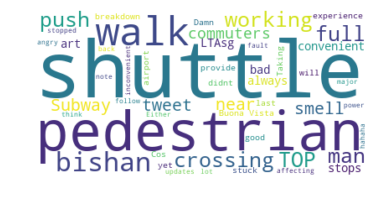

In [88]:
text = " ".join(t for t in data.Text)
wordcloud = WordCloud(max_font_size=120, max_words=50, background_color="white").generate(text)
plt.figure()

# Use the option interpolation = "bilinear" to smoothen the graphic.
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [89]:
# Save the image in the img folder:
wordcloud.to_file("twitterwordcloud2.png")